In [11]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [18]:
!git config --global user.email "shrinivasmore51@gmail.com"
!git config --global user.name "Shinu87"

In [19]:
!git clone https://github.com/Shinu87/Minor-Project---3rd-Year.git

Cloning into 'Minor-Project---3rd-Year'...


In [22]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

 422219
 4222191.ipynb
'422219 (1).ipynb'
'422219 (2).ipynb'
'422219 (3).ipynb'
'422219 (4).ipynb'
'422219 (5).ipynb'
'422219 (6).ipynb'
 422219.ipynb
 AI.ipynb
'A*.ipynb'
 ALLCODES.ipynb
 AMAON.ipynb
'BFS DFS.ipynb'
'chatbot(Langchain).ipynb'
'Copy of 422219 (1).ipynb'
'Copy of 422219.ipynb'
'Copy of AI.ipynb'
'Copy of housepredictionusinglinearregression.ipynb'
'Copy of Image_captioning'
'Copy of Image Captioning with Vision Transformer.ipynb'
 Game.ipynb
'graphical method'
 graph_image_captioning.ipynb
 housepredictionusingbayesian.ipynb
 housepredictionusinglinearregression.ipynb
'image_captioning_transformers (1).ipynb'
'image_captioning_transformers (2).ipynb'
 image_captioning_transformers.ipynb
'Image Captioning Using Attention Based.ipynb'
'Image Captioning Using Graphical Method.ipynb'
'Image Captioning using LSTM + Attention.ipynb'
'LLM from Scratch.ipynb'
 NGRAM.ipynb
'Predictive Maintenance for Industrial Equipment.ipynb'
 skipgram.ipynb
 skipGram.ipynb
 Untitled
 Untitled

In [20]:
!mv "/content/drive/MyDrive/Colab Notebooks/Image Captioning with Vision Transformer.ipynb" /content/Minor-Project---3rd-Year/


mv: cannot stat '/content/drive/MyDrive/Colab Notebooks/Image Captioning with Vision Transformer.ipynb': No such file or directory


In [23]:
!git checkout -b pretrainedmodel

Switched to a new branch 'pretrainedmodel'


In [24]:
!git branch


  main
* pretrainedmodel


In [21]:
%cd /content/Minor-Project---3rd-Year
!git add .
!git commit -m "Added image captioning project"
!git push origin main


/content/Minor-Project---3rd-Year
error: 'Minor-Project---3rd-Year/' does not have a commit checked out
fatal: adding files failed
On branch main
Your branch is based on 'origin/main', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Minor-Project---3rd-Year/

nothing added to commit but untracked files present (use "git add" to track)
fatal: could not read Username for 'https://github.com': No such device or address


In [1]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt
import requests
from nltk.translate.bleu_score import sentence_bleu
import numpy as np

In [2]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [3]:
def load_image(image_path):
    return Image.open(image_path).convert("RGB")

In [4]:
def generate_caption(image):
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        output = model.generate(**inputs, max_length=50, num_beams=5)
    return processor.batch_decode(output, skip_special_tokens=True)[0]

In [5]:
def display_image(image, caption):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"\n✨ Caption: {caption} ✨", fontsize=14, fontweight='bold', color='blue')
    plt.show()

In [6]:
def show_image_parts(image, caption):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    width, height = image.size
    crops = [
        image.crop((0, 0, width//2, height//2)),
        image.crop((width//2, 0, width, height//2)),
        image.crop((0, height//2, width//2, height)),
    ]
    for ax, crop, idx in zip(axes, crops, range(1, 4)):
        ax.imshow(crop)
        ax.axis("off")
        ax.set_title(f"Part {idx} Caption: {caption[:20]}...", fontsize=10, color='red')
    plt.tight_layout()
    plt.show()

In [7]:
def compute_bleu(reference_caption, generated_caption):
    reference = [reference_caption.split()]
    candidate = generated_caption.split()
    return sentence_bleu(reference, candidate)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


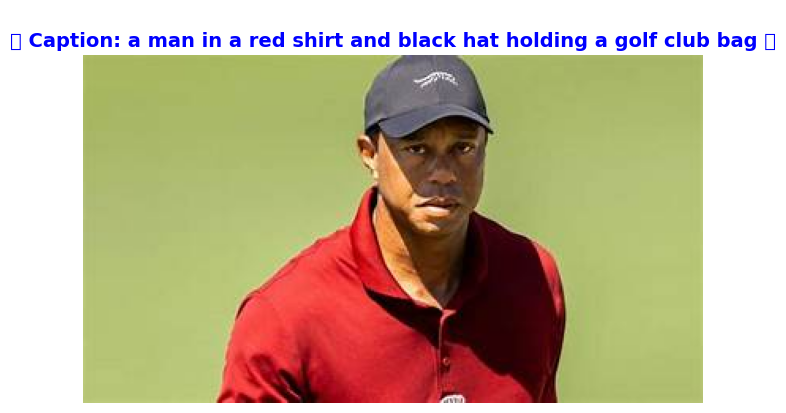

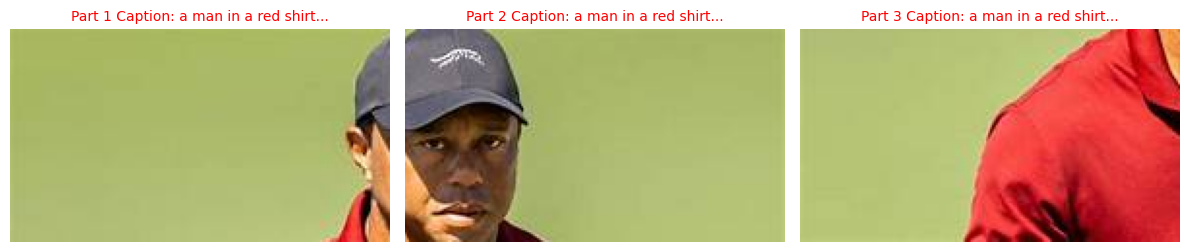


📊 BLEU Score: 5.3448396730677054e-155


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [9]:
image_url = "https://example.com/sample.jpg"
image_path = "/content/test2.jpg"
response = requests.get(image_url, stream=True)
if response.status_code == 200:
    with open(image_path, 'wb') as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)

reference_caption = "A person sitting on a bench in a park."
image = load_image(image_path)
generated_caption = generate_caption(image)
display_image(image, generated_caption)
show_image_parts(image, generated_caption)
bleu_score = compute_bleu(reference_caption, generated_caption)
print("\n📊 BLEU Score:", bleu_score)

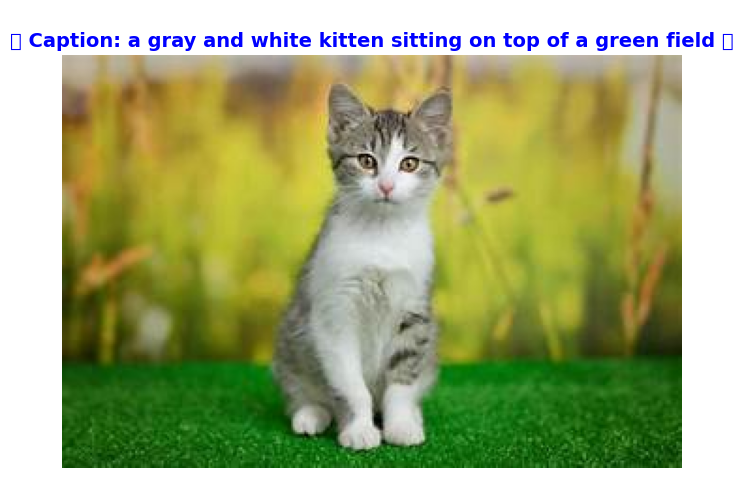

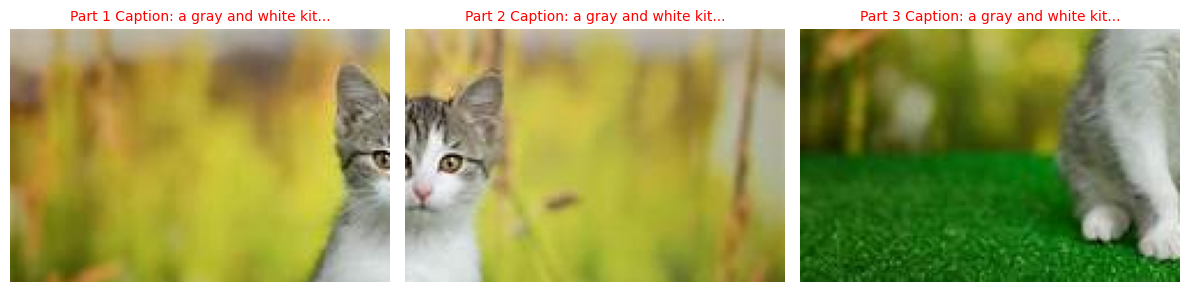


📊 BLEU Score: 6.223629500679345e-155


In [10]:
image_url = "https://example.com/sample.jpg"
image_path = "/content/test.jpg"
response = requests.get(image_url, stream=True)
if response.status_code == 200:
    with open(image_path, 'wb') as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)

reference_caption = "A person sitting on a bench in a park."
image = load_image(image_path)
generated_caption = generate_caption(image)
display_image(image, generated_caption)
show_image_parts(image, generated_caption)
bleu_score = compute_bleu(reference_caption, generated_caption)
print("\n📊 BLEU Score:", bleu_score)